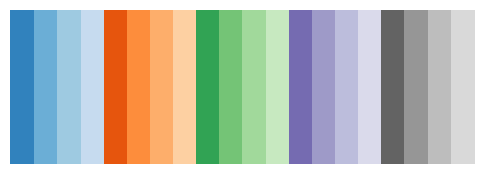

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib
current_path = os.getcwd()
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 2))

# Create a colormap using tab20b
cmap = plt.get_cmap('tab20c')

# Create a gradient image using numpy
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))  # Stack to make it visible

# Plot the gradient image with the tab20b colormap
ax.imshow(gradient, aspect='auto', cmap=cmap)

# Remove axis for better visibility of the colormap
ax.set_axis_off()

# Display the colormap
plt.show()

cm = 1/2.54 # convert inches to cm
columnwidth = 8.47415 # ACM template columnwidth in cm
fulltextwidth = 17.7917 # ACM template full text width in cm
golden_ratio = 1.61803398875 # only for example, other height2witdth ratio is fine of course

plt.rcParams.update({'font.size': 8, 'font.family': 'sans-serif', 'font.sans-serif': 'Helvetica'})
matplotlib.rcParams['axes.unicode_minus'] = False
# font settings
#plt.rcParams.update({'font.size': 8, 'font.family': 'sans-serif', 'font.sans-serif': 'Helvetica'})


In [2]:
def print_metrics_m(y_pred, y_test):
    print('Metrics:')

    print('Mean squared error:', np.mean((y_test - y_pred) ** 2))
    print('RMSE:', np.sqrt(np.mean((y_test - y_pred) ** 2)))
    print('Mean absolute error:', np.mean(np.abs(y_test - y_pred)))
    print('Mean error:', np.mean(y_pred - y_test))
    print('R^2:', r2_score(y_pred, y_test))
    print('Median absolute error:', np.median(np.abs(y_test - y_pred)))

    

def print_metrics_dpt(y_pred, y_test):
    # set lower bound of y_pred to 0.00001
    #if y_pred == 0:
    #    y_pred = 0.00001
    print('In diopters:')

    print('Mean squared error', np.mean((y_test - y_pred) ** 2))	
    print('RMSE: ', np.sqrt(np.mean((y_test - y_pred) ** 2)))
    print('Mean absolute error', np.mean(np.abs(y_test - y_pred)))
    print('Mean error', np.mean(y_pred - y_test))
    print('R^2', r2_score(y_pred, y_test))

    error_diopters = np.abs(y_pred - y_test)
    error = np.abs(y_pred - y_test)
    percent_below_125 = np.sum(error_diopters < 0.125) / len(error_diopters) * 100
    percent_below_001_m = np.sum(error < 0.01) / len(error) * 100
    percent_below_01 = np.sum(error < 0.1) / len(error) * 100
    percent_below_025 = np.sum(error_diopters < 0.25) / len(error_diopters) * 100

    print('Percent below 0.125 diopters:', percent_below_125)
    print('Percent below 0.01 m:', percent_below_001_m)
    print('Percent below 0.1 m:', percent_below_01)
    print('Percent below 0.25 dpt:', percent_below_025)

In [3]:
#models_m = ['center', 'cnnet', 'svr', 'vergence']
#models_d = ['center', 'cnnetdiopters', 'svr', 'vergence']


models_m = ['vergence', 'center', 'svr', 'cnnet']
models_d = ['vergence', 'center', 'svrdiopters', 'cnnetdiopters']

model_names = ['Vergence', 'Center', 'SVR', 'CNN']

y_pred_m = []
y_test_m = []
y_pred_d = []
y_test_d = []
errors_m = []
errors_d = []

for i, model in enumerate(models_m):
    print(model)
    path = current_path + '\\' + model
    y_pred_m.append(np.load(os.path.join(path, 'y_pred.npy')))
    #y_pred_m[-1] = np.clip(y_pred_m[-1], 0, 20)
    y_test_m.append(np.load(os.path.join(path, 'y_test.npy')))
    errors_m.append(y_pred_m[-1] - y_test_m[-1])

    y_pred = y_pred_m[-1]
    y_test = y_test_m[-1]


    print_metrics_m(y_pred, y_test)
    print()

for i, model in enumerate(models_d):
    print(model)
    path = current_path + '\\' + model
    y_pred_d.append(1 / np.load(os.path.join(path, 'y_pred.npy')))
    #y_pred_d[-1] = 1 / np.clip(y_pred_d[-1], 0, 20)
    y_test_d.append(1 / np.load(os.path.join(path, 'y_test.npy')))
    errors_d.append(y_pred_d[-1] - y_test_d[-1])
    
    print_metrics_dpt(y_pred_d[-1], y_test_d[-1])
    print()

vergence
Metrics:
Mean squared error: 7.619516953272264
RMSE: 2.76034725229857
Mean absolute error: 1.3527380163886342
Mean error: -1.0065351340636586
R^2: -1.8478263200897955
Median absolute error: 0.3025476662121883

center
Metrics:
Mean squared error: 7.087075349914598
RMSE: 2.6621561467942856
Mean absolute error: 0.8000537775717674
Mean error: 0.6932068503392665
R^2: 0.47262865531537324
Median absolute error: 0.009282017819062793

svr
Metrics:
Mean squared error: 0.9281607957900119
RMSE: 0.9634110212105796
Mean absolute error: 0.6248666823474481
Mean error: 0.013630949647305985
R^2: 0.23622140172857065
Median absolute error: 0.38690195835389934

cnnet
Metrics:
Mean squared error: 0.17944829
RMSE: 0.42361337
Mean absolute error: 0.16869849
Mean error: -0.023322457
R^2: 0.9726421698889982
Median absolute error: 0.07359183

vergence
In diopters:
Mean squared error 27.88607948145437
RMSE:  5.28072717354858
Mean absolute error 0.6673376423984071
Mean error 0.5678209635772697
R^2 -0.0151

In [4]:
intervals = [0, 1, 2, 3, 4, 5, 6]
binned_per_model = []

for i, model in enumerate(models_m):
    y_test = np.array(y_test_m[i])
    y_pred = y_pred_m[i]
    errors = np.array(errors_m[i])

    # bin the data
    binned = []
    for interval in intervals:
        if interval < 6:
            #print(len(errors[(y_test >= interval) & (y_test < interval + 1)]))
            binned.append(errors[(y_test >= interval) & (y_test < interval + 1)])
        else:
            binned.append(errors[y_test >= interval])

    binned_per_model.append(binned)

#print(len(binned_per_model[2][0]))

for i, interval in enumerate(intervals):
    print(f'Interval {i}:')
    # get all models' performances for first interval
    for j, model in enumerate(models_m):
        print(f'{model}: {np.mean(binned_per_model[j][i]):.2f} ± {np.std(binned_per_model[j][i]):.2f}')

Interval 0:
vergence: -0.01 ± 0.23
center: 0.80 ± 2.31
svr: 0.43 ± 0.56
cnnet: 0.03 ± 0.15
Interval 1:
vergence: -0.09 ± 0.89
center: 0.74 ± 2.47
svr: 0.21 ± 0.58
cnnet: 0.07 ± 0.34
Interval 2:
vergence: -0.56 ± 1.64
center: 0.55 ± 2.94
svr: -0.19 ± 0.81
cnnet: -0.01 ± 0.29
Interval 3:
vergence: -1.23 ± 2.05
center: 0.24 ± 1.98
svr: -0.64 ± 1.03
cnnet: -0.03 ± 0.39
Interval 4:
vergence: -1.98 ± 2.58
center: 0.99 ± 3.67
svr: -1.15 ± 1.33
cnnet: -0.09 ± 0.40
Interval 5:
vergence: -3.31 ± 2.54
center: 0.05 ± 2.08
svr: -1.98 ± 1.36
cnnet: -0.22 ± 0.55
Interval 6:
vergence: -6.62 ± 4.07
center: 0.84 ± 3.25
svr: nan ± nan
cnnet: -0.41 ± 0.95


c:\Users\admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## Boxplots

In [5]:
def print_stats(binned_per_model_d, intervals, step, name):
    fig, axs = plt.subplots(1, 1, figsize=(columnwidth*cm, columnwidth/4*cm), dpi=300)
    positions = []
    position_counter = 1
    box_width = 0.3
    colors = [cmap(0), cmap(4), cmap(8), cmap(12)]

    for i, interval in enumerate(intervals):
        # get all models' performances for first interval
        for j, model in enumerate(models_m):
            errors_model_interval = binned_per_model_d[j][i]
            box = plt.boxplot(errors_model_interval, positions=[position_counter], widths=box_width, patch_artist=True, showfliers=False)
        
            position_counter += 0.5

            for patch in box['boxes']:
                patch.set_facecolor(colors[j])

        positions.append(position_counter - 2 * 0.5 - 0.3)
        position_counter += 1

    # set model names as xticks, repeat for each interval
    plt.xticks(positions, [f'[{min},{min+step})' for min in intervals[:-1]] + [f'$\geq${intervals[-1]}'])

    # plot horizontal dashed line at y=0
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

    for color, model in zip(colors, models_m):
        plt.plot([], [], color=color, label=model, marker='s', linestyle='None')  # Dummy markers for the legend

    plt.legend()
    if step == 1:
        plt.ylabel('Error [m]')
        plt.xlabel('Interval [m]')
    else:
        plt.ylabel('Error [dpt]')
        plt.xlabel('Interval [dpt]')
    
    plt.tight_layout()
    plt.savefig('figures/errors_fiq_' + name + '.pdf', bbox_inches='tight', pad_inches=0)
    plt.savefig('figures/errors_fiq_' + name + '.svg', bbox_inches='tight', pad_inches=0)
    plt.show()




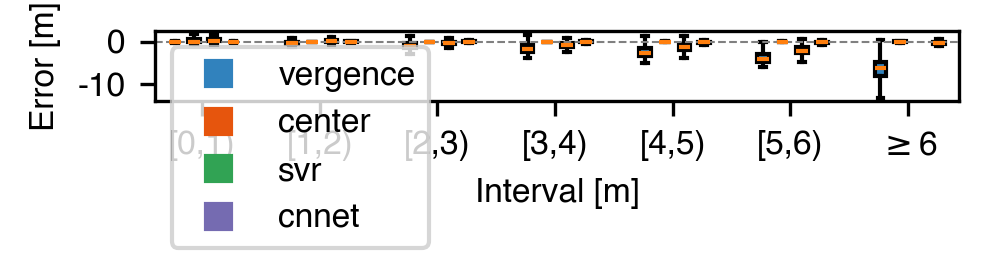

In [14]:
print_stats(binned_per_model, intervals, 1, 'm')

In [6]:
intervals = [0, 0.5, 1, 1.5, 2, 2.5, 3]
binned_per_model_d = []

for i, model in enumerate(models_d):
    y_test = np.array(y_test_d[i])
    y_pred = y_pred_d[i]
    errors = np.array(errors_d[i])

    # bin the data
    binned = []
    for interval in intervals:
        if interval < 3:
            #print(len(errors[(y_test >= interval) & (y_test < interval + 1)]))
            binned.append(errors[(y_test >= interval) & (y_test < interval + 0.5)])
        else:
            binned.append(errors[y_test >= interval])

    binned_per_model_d.append(binned)

'''
for i, interval in enumerate(intervals):
    print(f'Interval {i}:')
    # get all models' performances for first interval
    for j, model in enumerate(models_m):
        print(f'{model}: {np.mean(binned_per_model_d[j][i]):.2f} ± {np.std(binned_per_model_d[j][i]):.2f}')
'''
print_stats(binned_per_model_d, intervals, 0.5)

TypeError: print_stats() missing 1 required positional argument: 'name'

### Only one box per model

#### Meters:

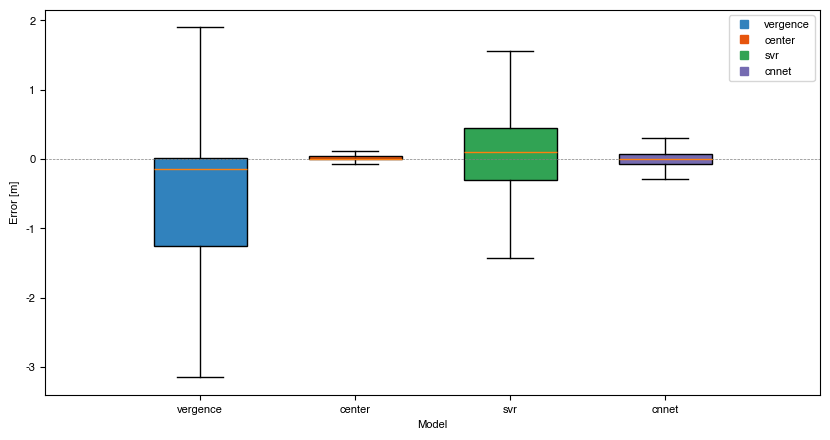

In [7]:
# plot without intervals, all data
plt.figure(figsize=(10, 5))
positions = []
position_counter = 1
box_width = 0.3
colors = [cmap(0), cmap(4), cmap(8), cmap(12)]

for j, model in enumerate(models_m):
    errors_model = errors_m[j]
    box = plt.boxplot(errors_model, positions=[position_counter], widths=box_width, patch_artist=True, showfliers=False)
    
    positions.append(position_counter)
    position_counter += 0.5

    for patch in box['boxes']:
        patch.set_facecolor(colors[j])

position_counter += 1

# set model names as xticks, repeat for each interval
plt.xticks(positions, models_m)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

for color, model in zip(colors, models_m):
    plt.plot([], [], color=color, label=model, marker='s', linestyle='None')  # Dummy markers for the legend

plt.legend()
plt.ylabel('Error [m]')
plt.xlabel('Model')
plt.show()



#### Diopters:

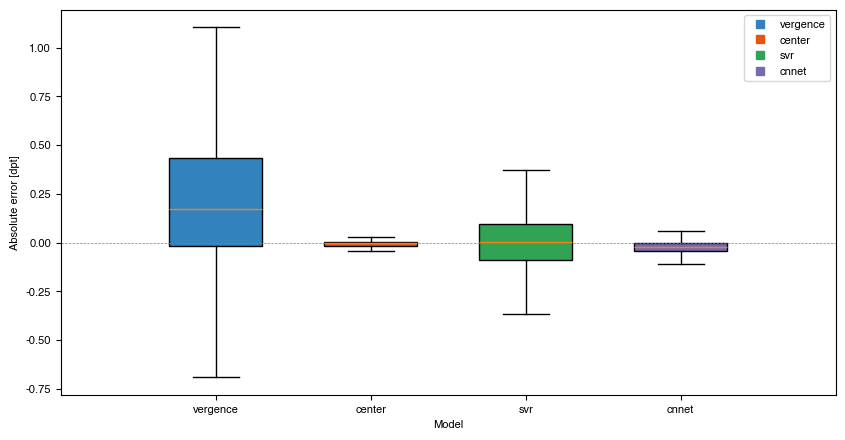

In [8]:
# plot without intervals, all data
plt.figure(figsize=(10, 5))
positions = []
position_counter = 1
box_width = 0.3
colors = [cmap(0), cmap(4), cmap(8), cmap(12)]

for j, model in enumerate(models_d):
    errors_model = errors_d[j]
    box = plt.boxplot(errors_model, positions=[position_counter], widths=box_width, patch_artist=True, showfliers=False)
    
    positions.append(position_counter)
    position_counter += 0.5

    for patch in box['boxes']:
        patch.set_facecolor(colors[j])

position_counter += 1

# set model names as xticks, repeat for each interval
plt.xticks(positions, models_m)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

for color, model in zip(colors, models_m):
    plt.plot([], [], color=color, label=model, marker='s', linestyle='None')  # Dummy markers for the legend

plt.legend()
plt.ylabel('Absolute error [dpt]')
plt.xlabel('Model')
plt.show()

## Histograms
#### Meters:

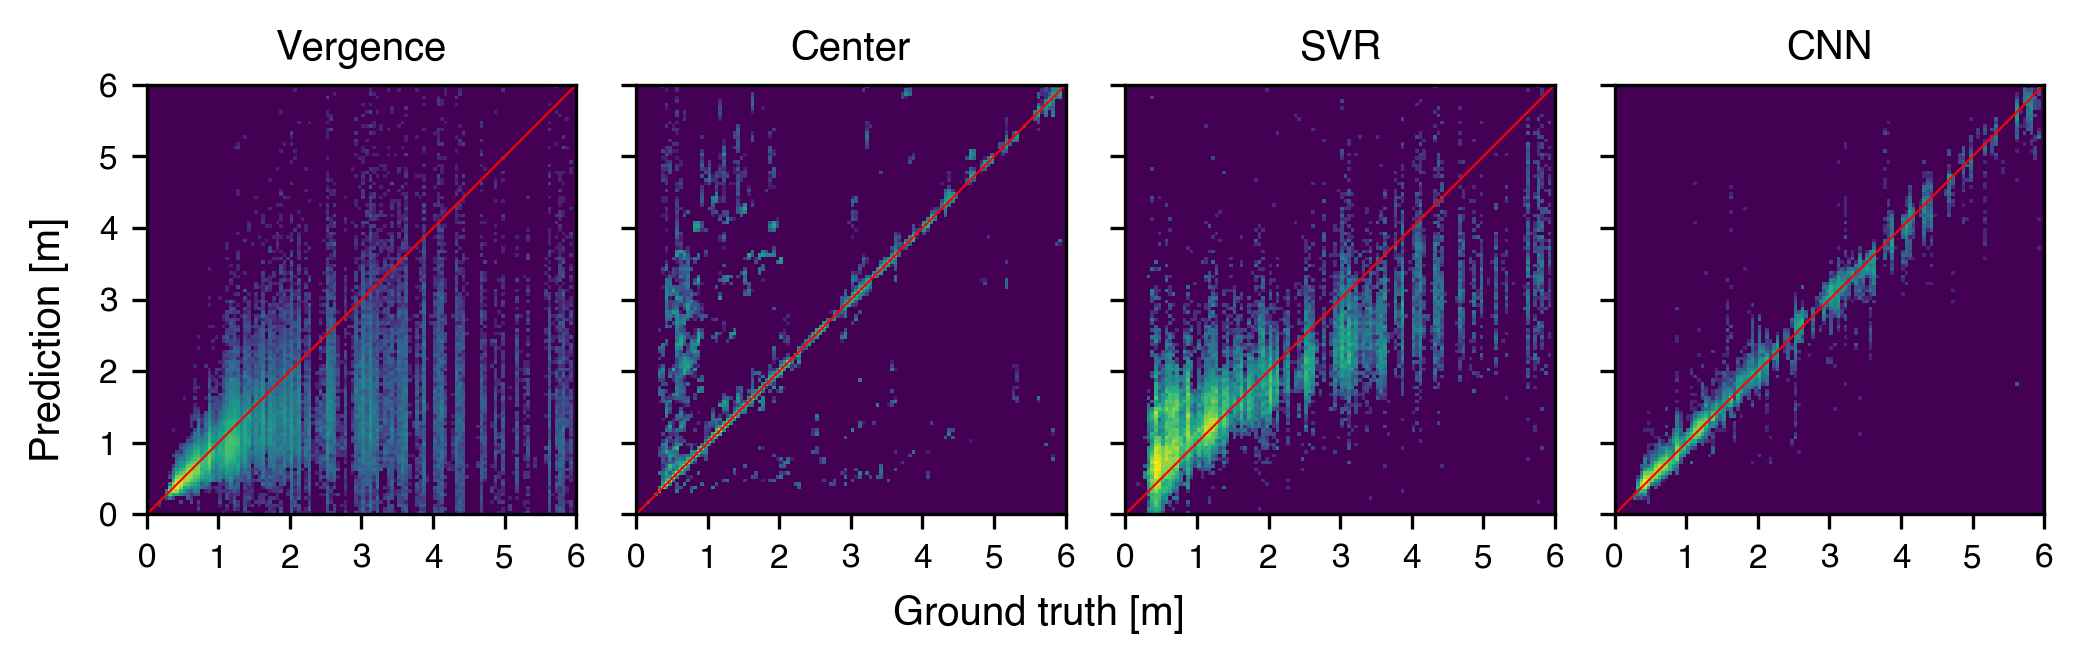

In [9]:
fig, axs = plt.subplots(1, len(models_m), figsize=(fulltextwidth*cm, fulltextwidth/3.5*cm), dpi=300, sharex=True, sharey=True)

for i, ax in enumerate(axs.flat):
    ax.hist2d(y_test_m[i], y_pred_m[i], bins=300, cmap='viridis', range=[[0, 15], [0, 15]], rasterized=True, norm=plt.cm.colors.LogNorm())#norm=plt.cm.colors.PowerNorm(gamma=0.5))# norm=plt.cm.colors.LogNorm()) 

    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)

    ax.set_title(model_names[i])

    # set background color to black
    ax.set_facecolor(plt.get_cmap('viridis')(0))

    # plot the line of equality
    ax.plot([0, 20], [0, 20], color='red', linewidth=0.5)
    ax.set_aspect('equal', 'box')

plt.gca().set_facecolor(plt.get_cmap('viridis')(0))

# make ticks at 1...7
plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 7, 1))

fig.supxlabel("Ground truth [m]")
fig.supylabel("Prediction [m]")
plt.tight_layout()
plt.savefig('figures/histograms_models_m.pdf', bbox_inches='tight', pad_inches=0)
plt.savefig('figures/histograms_models_m.svg', bbox_inches='tight', pad_inches=0)

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_24964\2227708156.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


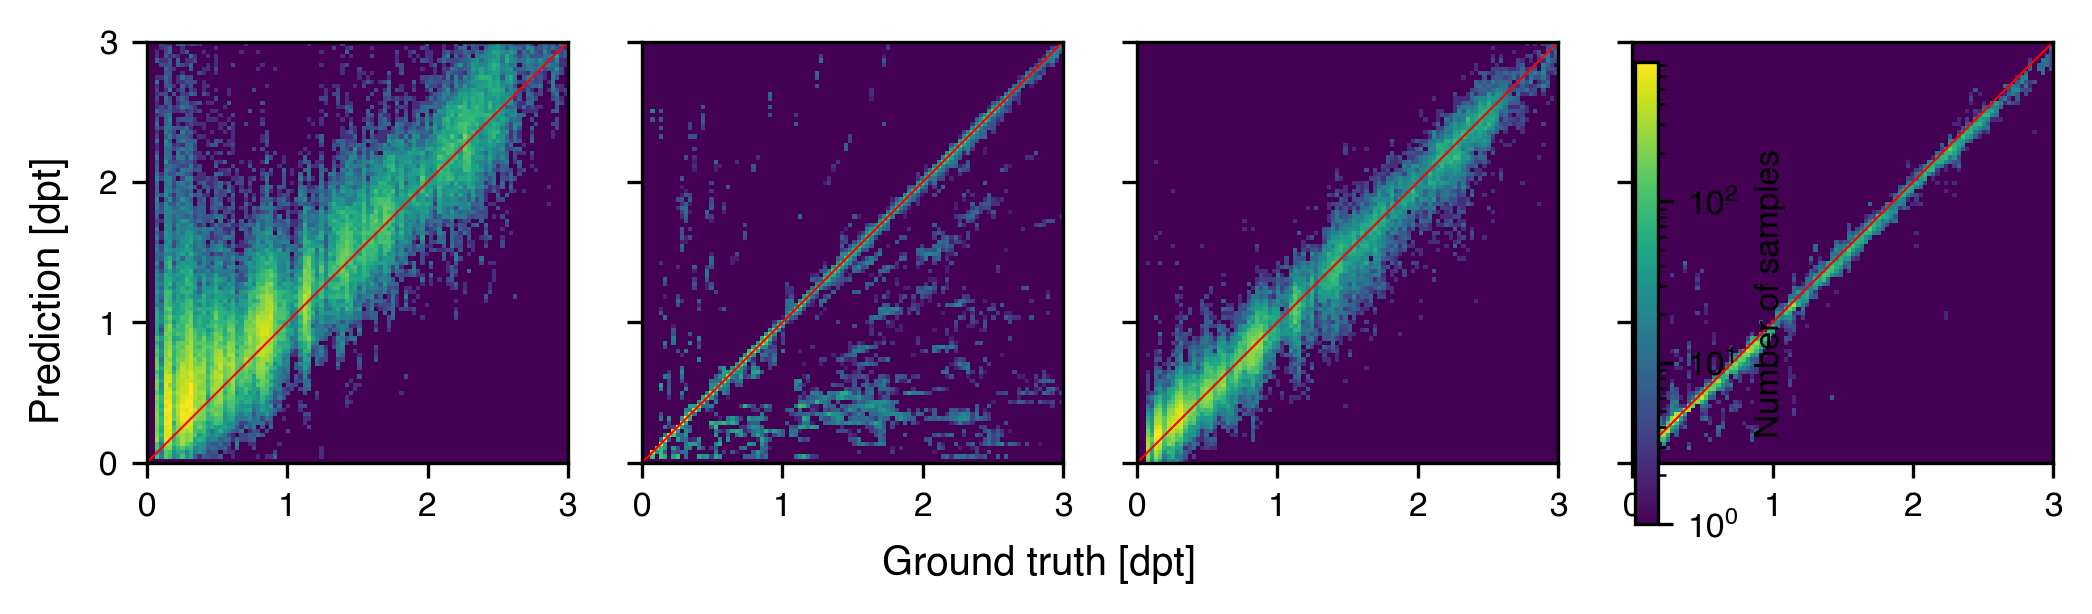

In [ ]:
fig, axs = plt.subplots(1, len(models_m), figsize=(fulltextwidth*cm, fulltextwidth/3.5*cm), dpi=300, sharex=True, sharey=True)

for i, ax in enumerate(axs.flat):
    em = ax.hist2d(y_test_d[i], y_pred_d[i], bins=500, cmap='viridis', range=[[0, 15], [0, 15]], rasterized=True, norm=plt.cm.colors.LogNorm())#norm=plt.cm.colors.PowerNorm(gamma=0.5))# norm=plt.cm.colors.LogNorm()) 

    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)

    #ax.set_title(model_names[i])

    # set background color to black
    ax.set_facecolor(plt.get_cmap('viridis')(0))

    # plot the line of equality
    ax.plot([0, 20], [0, 20], color='red', linewidth=0.5)
    ax.set_aspect('equal', 'box')

plt.gca().set_facecolor(plt.get_cmap('viridis')(0))
#plt.colorbar(em[3], ax=axs.ravel().tolist(), label='Number of samples')

# make ticks at 1...7
plt.xticks(np.arange(0, 4, 1))
plt.yticks(np.arange(0, 4, 1))
fig.supxlabel("Ground truth [dpt]")
fig.supylabel("Prediction [dpt]")

plt.tight_layout()
plt.savefig('figures/histograms_models_dpt.pdf', bbox_inches='tight', pad_inches=0)
plt.savefig('figures/histograms_models_dpt.svg', bbox_inches='tight', pad_inches=0)
plt.show()

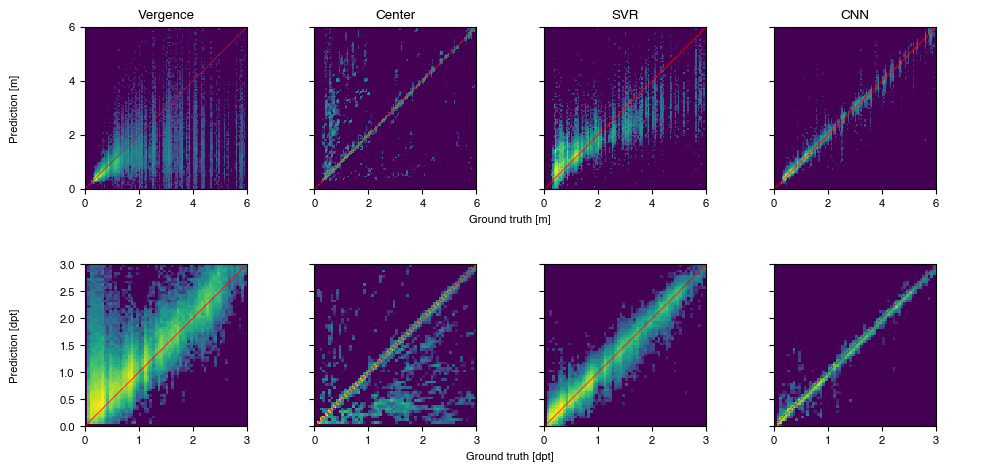

In [11]:
fig, axs = plt.subplots(2, len(models_m), figsize=(10, 5), sharex='row', sharey='row')

for i, ax in enumerate(axs.flat):
    if i < len(models_m):
        ax.hist2d(y_test_m[i % len(models_m)], y_pred_m[i % len(models_m)], bins=300, cmap='viridis', range=[[0, 15], [0, 15]], rasterized=True, norm=plt.cm.colors.LogNorm())#norm=plt.cm.colors.PowerNorm(gamma=0.5))# norm=plt.cm.colors.LogNorm()) 

        ax.set_xlim(0, 6)
        ax.set_ylim(0, 6)

        ax.set_xticks(np.arange(0, 8, 2))
        ax.set_yticks(np.arange(0, 8, 2))

        # set ticks without comma
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        
        ax.set_title(model_names[i])

    else:
        ax.hist2d(y_test_d[i % len(models_m)], y_pred_d[i % len(models_m)], bins=300, cmap='viridis', range=[[0, 15], [0, 15]], rasterized=True, norm=plt.cm.colors.LogNorm())#norm=plt.cm.colors.PowerNorm(gamma=0.5))# norm=plt.cm.colors.LogNorm()) 

        ax.set_xlim(0, 3)
        ax.set_ylim(0, 3)

    
    # set background color to black
    ax.set_facecolor(plt.get_cmap('viridis')(0))

    # plot the line of equality
    ax.plot([0, 20], [0, 20], color='red', linewidth=0.5)
    
    ax.set_aspect('equal', 'box')

#label_y = ["Prediction [m]", "Prediction [dpt]"]
#for l,ax in zip(label_y, axs):
#    ax[0].set_ylabel(l)

plt.subplots_adjust(wspace=0.1, hspace=0.4)
fig.add_subplot(211, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Prediction [m]")
plt.xlabel("Ground truth [m]")

fig.add_subplot(212, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Prediction [dpt]")
plt.xlabel("Ground truth [dpt]")

plt.tight_layout()
plt.savefig('figures/histograms_models.pdf', dpi=1000)

# CNN 

In [12]:
# sort y_test and y_pred of all models
y_test_m_sorted = []
y_pred_m_sorted = []
error_m_sorted = []

for i, model in enumerate(models_m):
    indices = np.argsort(y_test_m[i])
    y_test_m_sorted.append(y_test_m[i][indices])
    y_pred_m_sorted.append(y_pred_m[i][indices])
    error_m_sorted.append(errors_m[i][indices])


y_test_d_sorted = []
y_pred_d_sorted = []
error_d_sorted = []

for i, model in enumerate(models_d):
    indices = np.argsort(y_test_d[i])
    y_test_d_sorted.append(y_test_d[i][indices])
    y_pred_d_sorted.append(y_pred_d[i][indices])
    error_d_sorted.append(errors_d[i][indices])

In [22]:
# compute median of moving window of size 0.5m
window_size = 0.5   # 0.5m
median_error_m = []
median_error_d = []

for i, model in enumerate(models_m):
    y_pred = y_pred_m[i]
    y_test = y_test_m[i]
    errors = errors_m[i]

    median_error = []

    for j, dist in enumerate(y_test):
        errors_in_window = errors[(y_test >= dist - window_size) & (y_test < dist + window_size)]

        median_error.append(np.median(errors_in_window))

    median_error_m.append(median_error)

KeyboardInterrupt: 

In [13]:
df_cnn_m = pd.DataFrame({'y_test': y_test_m[3], 'y_pred': y_pred_m[3], 'error': errors_m[3]})
df_cnn_dpt = pd.DataFrame({'y_test': y_test_d[3], 'y_pred': y_pred_d[3], 'error': errors_d[3]})

display(df_cnn_m)
display(df_cnn_dpt)

,y_test,y_pred,error
0,3.068392,3.209799,0.141407
1,3.068550,3.190808,0.122258
2,3.067154,3.243611,0.176457
3,3.066358,3.255532,0.189174
4,3.067573,3.282064,0.214491
...,...,...,...
30002,0.730914,0.732759,0.001845
30003,0.735296,0.877568,0.142272
30004,0.728808,0.944944,0.216136
30005,0.733782,0.909773,0.175991


,y_test,y_pred,error
0,0.325904,0.326142,0.000238
1,0.325887,0.324680,-0.001207
2,0.326035,0.338004,0.011969
3,0.326120,0.321314,-0.004806
4,0.325991,0.333697,0.007707
...,...,...,...
30002,1.368150,1.341696,-0.026454
30003,1.359997,1.333378,-0.026618
30004,1.372104,1.323787,-0.048316
30005,1.362802,1.333625,-0.029178


In [14]:
df_cnn_m_sorted = df_cnn_m.sort_values(by='y_test')
df_cnn_dpt_sorted = df_cnn_dpt.sort_values(by='y_test')

In [15]:
df_center_m_sorted = pd.DataFrame({'y_test': y_test_m[1], 'y_pred': y_pred_m[1], 'error': errors_m[1]}).sort_values(by='y_test')
df_center_dpt_sorted = pd.DataFrame({'y_test': y_test_d[1], 'y_pred': y_pred_d[1], 'error': errors_d[1]}).sort_values(by='y_test')

df_svr_m_sorted = pd.DataFrame({'y_test': y_test_m[2], 'y_pred': y_pred_m[2], 'error': errors_m[2]}).sort_values(by='y_test')
df_svr_dpt_sorted = pd.DataFrame({'y_test': y_test_d[2], 'y_pred': y_pred_d[2], 'error': errors_d[2]}).sort_values(by='y_test')

df_vergence_m_sorted = pd.DataFrame({'y_test': y_test_m[0], 'y_pred': y_pred_m[0], 'error': errors_m[0]}).sort_values(by='y_test')
df_vergence_dpt_sorted = pd.DataFrame({'y_test': y_test_d[0], 'y_pred': y_pred_d[0], 'error': errors_d[0]}).sort_values(by='y_test')


In [16]:
binsize_m = 0.5
binsize_d = 0.25

max_dist_m = 6
max_dist_d = 3

# add column with respective bin id to each dataframe, depending on y_test and which bin interval it falls into, use lower bin edge as bin id
df_center_m_sorted['bin'] = np.floor(df_center_m_sorted['y_test'] / binsize_m) * binsize_m
df_center_dpt_sorted['bin'] = np.floor(df_center_dpt_sorted['y_test'] / binsize_d) * binsize_d

df_svr_m_sorted['bin'] = np.floor(df_svr_m_sorted['y_test'] / binsize_m) * binsize_m
df_svr_dpt_sorted['bin'] = np.floor(df_svr_dpt_sorted['y_test'] / binsize_d) * binsize_d

df_vergence_m_sorted['bin'] = np.floor(df_vergence_m_sorted['y_test'] / binsize_m) * binsize_m
df_vergence_dpt_sorted['bin'] = np.floor(df_vergence_dpt_sorted['y_test'] / binsize_d) * binsize_d

df_cnn_m_sorted['bin'] = np.floor(df_cnn_m_sorted['y_test'] / binsize_m) * binsize_m
df_cnn_dpt_sorted['bin'] = np.floor(df_cnn_dpt_sorted['y_test'] / binsize_d) * binsize_d



df_center_m_sorted.loc[df_center_m_sorted['y_test'] >= max_dist_m, 'bin'] = max_dist_m - binsize_m
df_center_dpt_sorted.loc[df_center_dpt_sorted['y_test'] >= max_dist_d, 'bin'] = max_dist_d - binsize_d

df_svr_m_sorted.loc[df_svr_m_sorted['y_test'] >= max_dist_m, 'bin'] = max_dist_m - binsize_m
df_svr_dpt_sorted.loc[df_svr_dpt_sorted['y_test'] >= max_dist_d, 'bin'] = max_dist_d - binsize_d

df_vergence_m_sorted.loc[df_vergence_m_sorted['y_test'] >= max_dist_m, 'bin'] = max_dist_m - binsize_m
df_vergence_dpt_sorted.loc[df_vergence_dpt_sorted['y_test'] >= max_dist_d, 'bin'] = max_dist_d - binsize_d

df_cnn_m_sorted.loc[df_cnn_m_sorted['y_test'] >= max_dist_m, 'bin'] = max_dist_m - binsize_m
df_cnn_dpt_sorted.loc[df_cnn_dpt_sorted['y_test'] >= max_dist_d, 'bin'] = max_dist_d - binsize_d

# compute median of moving window of size 0.5m
window_size = 0.5   # 0.5m
median_error_center = []

display(df_center_m_sorted)
display(df_center_dpt_sorted)

display(df_svr_m_sorted)
display(df_svr_dpt_sorted)

display(df_vergence_m_sorted)
display(df_vergence_dpt_sorted)

display(df_cnn_m_sorted)
display(df_cnn_dpt_sorted)

,y_test,y_pred,error,bin
21881,0.178506,0.178686,0.000181,0.0
21887,0.178563,0.178968,0.000405,0.0
21880,0.178600,0.178739,0.000139,0.0
21885,0.178722,0.178978,0.000256,0.0
21886,0.180424,0.180495,0.000071,0.0
...,...,...,...,...
16174,15.354519,15.308220,-0.046299,5.5
16180,15.354521,15.315554,-0.038967,5.5
16175,15.354559,15.317874,-0.036685,5.5
16179,15.354833,15.330129,-0.024704,5.5


,y_test,y_pred,error,bin
16176,0.065126,0.065146,0.000020,0.00
16179,0.065126,0.065231,0.000105,0.00
16175,0.065127,0.065283,0.000156,0.00
16180,0.065127,0.065293,0.000166,0.00
16174,0.065127,0.065324,0.000197,0.00
...,...,...,...,...
21886,5.542505,5.540328,-0.002177,2.75
21885,5.595275,5.587275,-0.008000,2.75
21880,5.599089,5.594735,-0.004354,2.75
21887,5.600269,5.587584,-0.012685,2.75


,y_test,y_pred,error,bin
18172,0.179999,1.942248,1.762248,0.0
18086,0.182223,0.424747,0.242524,0.0
17994,0.184079,0.389203,0.205124,0.0
18357,0.185573,0.431701,0.246128,0.0
45156,0.264075,1.088891,0.824815,0.0
...,...,...,...,...
3474,5.939654,4.209242,-1.730412,5.5
3971,5.950631,4.650880,-1.299751,5.5
4013,5.952075,6.694609,0.742534,5.5
3751,5.953039,6.152095,0.199056,5.5


,y_test,y_pred,error,bin
17052,0.065126,0.073576,0.008450,0.00
16784,0.065126,0.094499,0.029373,0.00
16358,0.065127,0.039835,-0.025292,0.00
17218,0.065127,0.069193,0.004066,0.00
16745,0.065128,0.016952,-0.048176,0.00
...,...,...,...,...
49810,3.787479,3.631564,-0.155915,2.75
49842,3.787805,3.592687,-0.195118,2.75
49096,3.818358,3.103801,-0.714557,2.75
20094,5.352792,5.353377,0.000585,2.75


,y_test,y_pred,error,bin
21881,0.178506,0.149881,-0.028625,0.0
21887,0.178563,0.147788,-0.030775,0.0
21880,0.178600,0.149721,-0.028880,0.0
21885,0.178722,0.153738,-0.024984,0.0
21886,0.180424,0.151104,-0.029319,0.0
...,...,...,...,...
16174,15.354519,2.320501,-13.034018,5.5
16180,15.354521,4.750520,-10.604001,5.5
16175,15.354559,6.087014,-9.267545,5.5
16179,15.354833,1.598951,-13.755882,5.5


,y_test,y_pred,error,bin
16176,0.065126,0.358307,0.293181,0.00
16179,0.065126,0.625410,0.560284,0.00
16175,0.065127,0.164284,0.099157,0.00
16180,0.065127,0.210503,0.145376,0.00
16174,0.065127,0.430941,0.365814,0.00
...,...,...,...,...
21886,5.542505,6.617942,1.075438,2.75
21885,5.595275,6.504578,0.909303,2.75
21880,5.599089,6.679105,1.080015,2.75
21887,5.600269,6.766437,1.166168,2.75


,y_test,y_pred,error,bin
14602,0.294071,0.276898,-0.017173,0.0
14597,0.294277,0.277507,-0.016770,0.0
14568,0.294829,0.233444,-0.061384,0.0
14573,0.294829,0.244835,-0.049995,0.0
14600,0.294873,0.298597,0.003725,0.0
...,...,...,...,...
15975,15.351936,15.249035,-0.102901,5.5
15973,15.352018,15.289480,-0.062538,5.5
15974,15.352022,15.076143,-0.275879,5.5
15972,15.352047,15.239930,-0.112117,5.5


,y_test,y_pred,error,bin
15970,0.065138,0.071561,0.006423,0.00
15972,0.065138,0.069201,0.004063,0.00
15974,0.065138,0.070549,0.005411,0.00
15973,0.065138,0.066462,0.001324,0.00
15975,0.065138,0.065101,-0.000038,0.00
...,...,...,...,...
14600,3.391294,3.032520,-0.358774,2.75
14573,3.391792,3.205027,-0.186764,2.75
14568,3.391802,3.180115,-0.211687,2.75
14597,3.398158,3.097814,-0.300344,2.75


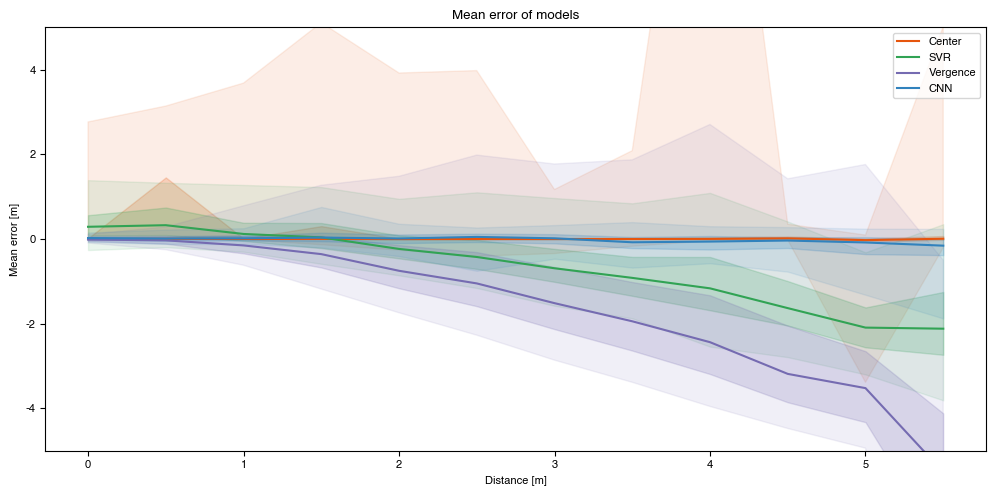

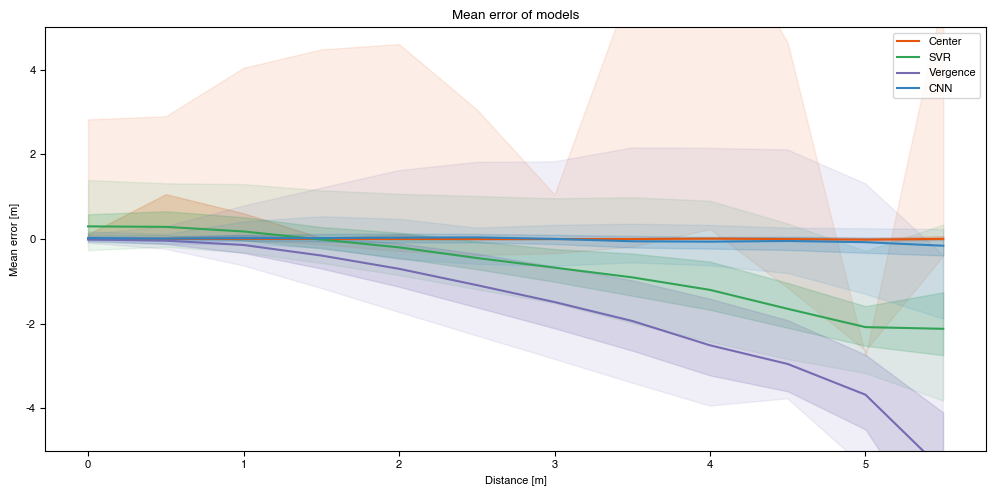

<Figure size 1000x500 with 0 Axes>

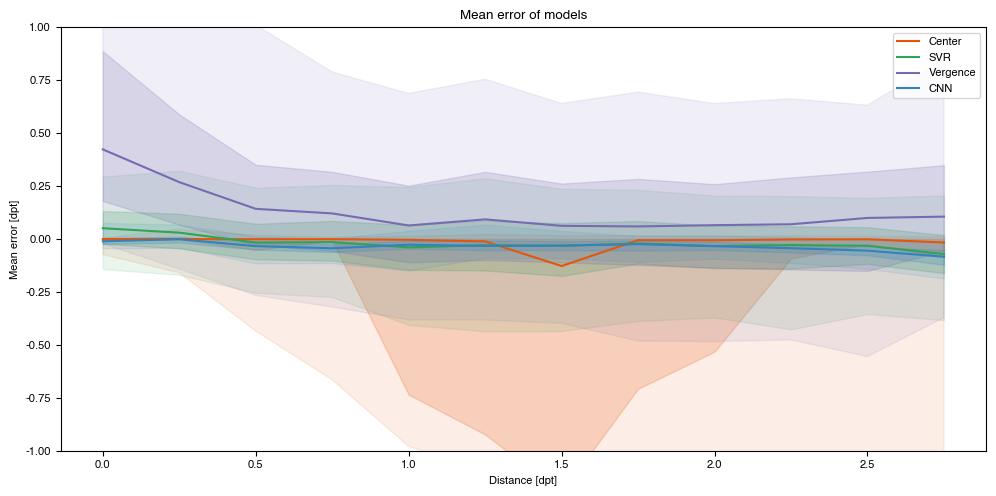

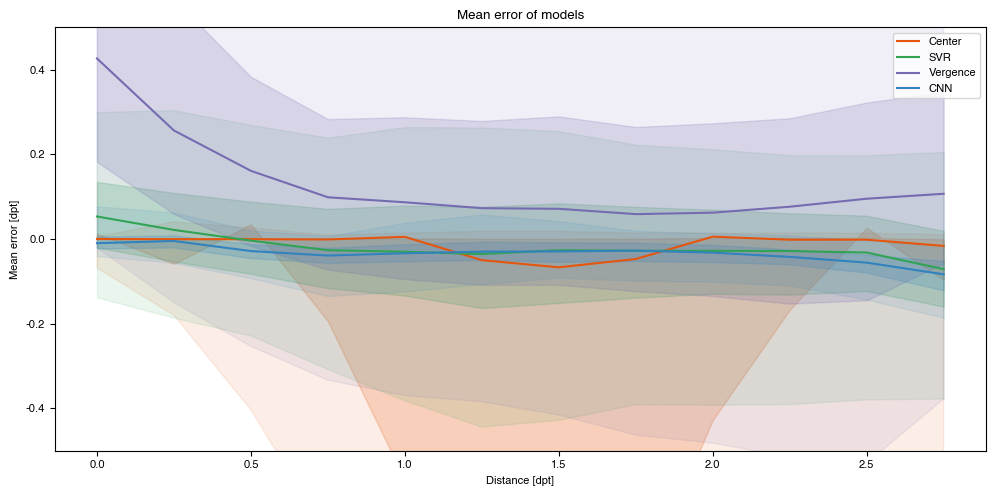

In [17]:
# mean error
mean_error_center_m = df_center_m_sorted.groupby('bin')['error'].mean()
mean_error_center_dpt = df_center_dpt_sorted.groupby('bin')['error'].mean()

mean_error_svr_m = df_svr_m_sorted.groupby('bin')['error'].mean()
mean_error_svr_dpt = df_svr_dpt_sorted.groupby('bin')['error'].mean()

mean_error_vergence_m = df_vergence_m_sorted.groupby('bin')['error'].mean()
mean_error_vergence_dpt = df_vergence_dpt_sorted.groupby('bin')['error'].mean()

mean_error_cnn_m = df_cnn_m_sorted.groupby('bin')['error'].mean()
mean_error_cnn_dpt = df_cnn_dpt_sorted.groupby('bin')['error'].mean()

# sd of error
std_error_center_m = df_center_m_sorted.groupby('bin')['error'].std()
std_error_center_dpt = df_center_dpt_sorted.groupby('bin')['error'].std()

std_error_svr_m = df_svr_m_sorted.groupby('bin')['error'].std()
std_error_svr_dpt = df_svr_dpt_sorted.groupby('bin')['error'].std()

std_error_vergence_m = df_vergence_m_sorted.groupby('bin')['error'].std()
std_error_vergence_dpt = df_vergence_dpt_sorted.groupby('bin')['error'].std()

std_error_cnn_m = df_cnn_m_sorted.groupby('bin')['error'].std()
std_error_cnn_dpt = df_cnn_dpt_sorted.groupby('bin')['error'].std()

# 25% percentile
percentile_25_center_m = df_center_m_sorted.groupby('bin')['error'].quantile(0.25)
percentile_25_center_dpt = df_center_dpt_sorted.groupby('bin')['error'].quantile(0.25)

percentile_25_svr_m = df_svr_m_sorted.groupby('bin')['error'].quantile(0.25)
percentile_25_svr_dpt = df_svr_dpt_sorted.groupby('bin')['error'].quantile(0.25)

percentile_25_vergence_m = df_vergence_m_sorted.groupby('bin')['error'].quantile(0.25)
percentile_25_vergence_dpt = df_vergence_dpt_sorted.groupby('bin')['error'].quantile(0.25)

percentile_25_cnn_m = df_cnn_m_sorted.groupby('bin')['error'].quantile(0.25)
percentile_25_cnn_dpt = df_cnn_dpt_sorted.groupby('bin')['error'].quantile(0.25)

# 75% percentile
percentile_75_center_m = df_center_m_sorted.groupby('bin')['error'].quantile(0.75)
percentile_75_center_dpt = df_center_dpt_sorted.groupby('bin')['error'].quantile(0.75)

percentile_75_svr_m = df_svr_m_sorted.groupby('bin')['error'].quantile(0.75)
percentile_75_svr_dpt = df_svr_dpt_sorted.groupby('bin')['error'].quantile(0.75)

percentile_75_vergence_m = df_vergence_m_sorted.groupby('bin')['error'].quantile(0.75)
percentile_75_vergence_dpt = df_vergence_dpt_sorted.groupby('bin')['error'].quantile(0.75)

percentile_75_cnn_m = df_cnn_m_sorted.groupby('bin')['error'].quantile(0.75)
percentile_75_cnn_dpt = df_cnn_dpt_sorted.groupby('bin')['error'].quantile(0.75)

# 50% percentile
percentile_50_center_m = df_center_m_sorted.groupby('bin')['error'].quantile(0.5)
percentile_50_center_dpt = df_center_dpt_sorted.groupby('bin')['error'].quantile(0.5)

percentile_50_svr_m = df_svr_m_sorted.groupby('bin')['error'].quantile(0.5)
percentile_50_svr_dpt = df_svr_dpt_sorted.groupby('bin')['error'].quantile(0.5)

percentile_50_vergence_m = df_vergence_m_sorted.groupby('bin')['error'].quantile(0.5)
percentile_50_vergence_dpt = df_vergence_dpt_sorted.groupby('bin')['error'].quantile(0.5)

percentile_50_cnn_m = df_cnn_m_sorted.groupby('bin')['error'].quantile(0.5)
percentile_50_cnn_dpt = df_cnn_dpt_sorted.groupby('bin')['error'].quantile(0.5)

# 5% percentile
percentile_5_center_m = df_center_m_sorted.groupby('bin')['error'].quantile(0.05)
percentile_5_center_dpt = df_center_dpt_sorted.groupby('bin')['error'].quantile(0.05)

percentile_5_svr_m = df_svr_m_sorted.groupby('bin')['error'].quantile(0.05)
percentile_5_svr_dpt = df_svr_dpt_sorted.groupby('bin')['error'].quantile(0.05)

percentile_5_vergence_m = df_vergence_m_sorted.groupby('bin')['error'].quantile(0.05)
percentile_5_vergence_dpt = df_vergence_dpt_sorted.groupby('bin')['error'].quantile(0.05)

percentile_5_cnn_m = df_cnn_m_sorted.groupby('bin')['error'].quantile(0.05)
percentile_5_cnn_dpt = df_cnn_dpt_sorted.groupby('bin')['error'].quantile(0.05)

# 95% percentile
percentile_95_center_m = df_center_m_sorted.groupby('bin')['error'].quantile(0.95)
percentile_95_center_dpt = df_center_dpt_sorted.groupby('bin')['error'].quantile(0.95)

percentile_95_svr_m = df_svr_m_sorted.groupby('bin')['error'].quantile(0.95)
percentile_95_svr_dpt = df_svr_dpt_sorted.groupby('bin')['error'].quantile(0.95)

percentile_95_vergence_m = df_vergence_m_sorted.groupby('bin')['error'].quantile(0.95)
percentile_95_vergence_dpt = df_vergence_dpt_sorted.groupby('bin')['error'].quantile(0.95)

percentile_95_cnn_m = df_cnn_m_sorted.groupby('bin')['error'].quantile(0.95)
percentile_95_cnn_dpt = df_cnn_dpt_sorted.groupby('bin')['error'].quantile(0.95)


# error depending on distance [m]
plt.figure(figsize=(10, 5))

plt.plot(percentile_50_center_m.index, percentile_50_center_m, label='Center', color=cmap(4))
plt.fill_between(percentile_50_center_m.index, percentile_25_center_m, percentile_75_center_m, alpha=0.2, color=cmap(4))
plt.fill_between(percentile_50_center_m.index, percentile_5_center_m, percentile_95_center_m, alpha=0.1, color=cmap(4))

plt.plot(percentile_50_svr_m.index, percentile_50_svr_m, label='SVR', color=cmap(8))
plt.fill_between(percentile_50_svr_m.index, percentile_25_svr_m, percentile_75_svr_m, alpha=0.2, color=cmap(8))
plt.fill_between(percentile_50_svr_m.index, percentile_5_svr_m, percentile_95_svr_m, alpha=0.1, color=cmap(8))

plt.plot(percentile_50_vergence_m.index, percentile_50_vergence_m, label='Vergence', color=cmap(12))
plt.fill_between(percentile_50_vergence_m.index, percentile_25_vergence_m, percentile_75_vergence_m, alpha=0.2, color=cmap(12))
plt.fill_between(percentile_50_vergence_m.index, percentile_5_vergence_m, percentile_95_vergence_m, alpha=0.1, color=cmap(12))

plt.plot(percentile_50_cnn_m.index, percentile_50_cnn_m, label='CNN', color=cmap(0))
plt.fill_between(percentile_50_cnn_m.index, percentile_25_cnn_m, percentile_75_cnn_m, alpha=0.2, color=cmap(0))
plt.fill_between(percentile_50_cnn_m.index, percentile_5_cnn_m, percentile_95_cnn_m, alpha=0.1, color=cmap(0))


plt.ylim(-5, 5)

plt.legend()
plt.xlabel('Distance [m]')
plt.ylabel('Mean error [m]')
plt.title('Mean error of models')
plt.tight_layout()
plt.show()


from scipy.signal import savgol_filter


# smoothed error depending on distance [m]

plt.figure(figsize=(10, 5))
plt.plot(percentile_50_center_m.index, savgol_filter(percentile_50_center_m, 5, 3), label='Center', color=cmap(4))
plt.fill_between(percentile_50_center_m.index, savgol_filter(percentile_25_center_m, 5, 3), savgol_filter(percentile_75_center_m, 5, 3), alpha=0.2, color=cmap(4))
plt.fill_between(percentile_50_center_m.index, savgol_filter(percentile_5_center_m, 5, 3), savgol_filter(percentile_95_center_m, 5, 3), alpha=0.1, color=cmap(4))

plt.plot(percentile_50_svr_m.index, savgol_filter(percentile_50_svr_m, 5, 3), label='SVR', color=cmap(8))
plt.fill_between(percentile_50_svr_m.index, savgol_filter(percentile_25_svr_m, 5, 3), savgol_filter(percentile_75_svr_m, 5, 3), alpha=0.2, color=cmap(8))
plt.fill_between(percentile_50_svr_m.index, savgol_filter(percentile_5_svr_m, 5, 3), savgol_filter(percentile_95_svr_m, 5, 3), alpha=0.1, color=cmap(8))

plt.plot(percentile_50_vergence_m.index, savgol_filter(percentile_50_vergence_m, 5, 3), label='Vergence', color=cmap(12))
plt.fill_between(percentile_50_vergence_m.index, savgol_filter(percentile_25_vergence_m, 5, 3), savgol_filter(percentile_75_vergence_m, 5, 3), alpha=0.2, color=cmap(12))
plt.fill_between(percentile_50_vergence_m.index, savgol_filter(percentile_5_vergence_m, 5, 3), savgol_filter(percentile_95_vergence_m, 5, 3), alpha=0.1, color=cmap(12))

plt.plot(percentile_50_cnn_m.index, savgol_filter(percentile_50_cnn_m, 5, 3), label='CNN', color=cmap(0))
plt.fill_between(percentile_50_cnn_m.index, savgol_filter(percentile_25_cnn_m, 5, 3), savgol_filter(percentile_75_cnn_m, 5, 3), alpha=0.2, color=cmap(0))
plt.fill_between(percentile_50_cnn_m.index, savgol_filter(percentile_5_cnn_m, 5, 3), savgol_filter(percentile_95_cnn_m, 5, 3), alpha=0.1, color=cmap(0))

plt.ylim(-5, 5)

plt.legend()
plt.xlabel('Distance [m]')
plt.ylabel('Mean error [m]')
plt.title('Mean error of models')
plt.tight_layout()
plt.show()


# error depending on distance [dpt]

plt.figure(figsize=(10, 5))


plt.figure(figsize=(10, 5))
plt.plot(percentile_50_center_dpt.index, percentile_50_center_dpt, label='Center', color=cmap(4))
plt.fill_between(percentile_50_center_dpt.index, percentile_25_center_dpt, percentile_75_center_dpt, alpha=0.2, color=cmap(4))
plt.fill_between(percentile_50_center_dpt.index, percentile_5_center_dpt, percentile_95_center_dpt, alpha=0.1, color=cmap(4))

plt.plot(percentile_50_svr_dpt.index, percentile_50_svr_dpt, label='SVR', color=cmap(8))
plt.fill_between(percentile_50_svr_dpt.index, percentile_25_svr_dpt, percentile_75_svr_dpt, alpha=0.2, color=cmap(8))
plt.fill_between(percentile_50_svr_dpt.index, percentile_5_svr_dpt, percentile_95_svr_dpt, alpha=0.1, color=cmap(8))

plt.plot(percentile_50_vergence_dpt.index, percentile_50_vergence_dpt, label='Vergence', color=cmap(12))
plt.fill_between(percentile_50_vergence_dpt.index, percentile_25_vergence_dpt, percentile_75_vergence_dpt, alpha=0.2, color=cmap(12))
plt.fill_between(percentile_50_vergence_dpt.index, percentile_5_vergence_dpt, percentile_95_vergence_dpt, alpha=0.1, color=cmap(12))

plt.plot(percentile_50_cnn_dpt.index, percentile_50_cnn_dpt, label='CNN', color=cmap(0))
plt.fill_between(percentile_50_cnn_dpt.index, percentile_25_cnn_dpt, percentile_75_cnn_dpt, alpha=0.2, color=cmap(0))
plt.fill_between(percentile_50_cnn_dpt.index, percentile_5_cnn_dpt, percentile_95_cnn_dpt, alpha=0.1, color=cmap(0))

plt.ylim(-1, 1)

plt.legend()
plt.xlabel('Distance [dpt]')
plt.ylabel('Mean error [dpt]')
plt.title('Mean error of models')
plt.tight_layout()
plt.show()

# smoothed error depending on distance [dpt]

plt.figure(figsize=(10, 5))
plt.plot(percentile_50_center_dpt.index, savgol_filter(percentile_50_center_dpt, 5, 3), label='Center', color=cmap(4))
plt.fill_between(percentile_50_center_dpt.index, savgol_filter(percentile_25_center_dpt, 5, 3), savgol_filter(percentile_75_center_dpt, 5, 3), alpha=0.2, color=cmap(4))
plt.fill_between(percentile_50_center_dpt.index, savgol_filter(percentile_5_center_dpt, 5, 3), savgol_filter(percentile_95_center_dpt, 5, 3), alpha=0.1, color=cmap(4))

plt.plot(percentile_50_svr_dpt.index, savgol_filter(percentile_50_svr_dpt, 5, 3), label='SVR', color=cmap(8))
plt.fill_between(percentile_50_svr_dpt.index, savgol_filter(percentile_25_svr_dpt, 5, 3), savgol_filter(percentile_75_svr_dpt, 5, 3), alpha=0.2, color=cmap(8))
plt.fill_between(percentile_50_svr_dpt.index, savgol_filter(percentile_5_svr_dpt, 5, 3), savgol_filter(percentile_95_svr_dpt, 5, 3), alpha=0.1, color=cmap(8))

plt.plot(percentile_50_vergence_dpt.index, savgol_filter(percentile_50_vergence_dpt, 5, 3), label='Vergence', color=cmap(12))
plt.fill_between(percentile_50_vergence_dpt.index, savgol_filter(percentile_25_vergence_dpt, 5, 3), savgol_filter(percentile_75_vergence_dpt, 5, 3), alpha=0.2, color=cmap(12))
plt.fill_between(percentile_50_vergence_dpt.index, savgol_filter(percentile_5_vergence_dpt, 5, 3), savgol_filter(percentile_95_vergence_dpt, 5, 3), alpha=0.1, color=cmap(12))

plt.plot(percentile_50_cnn_dpt.index, savgol_filter(percentile_50_cnn_dpt, 5, 3), label='CNN', color=cmap(0))
plt.fill_between(percentile_50_cnn_dpt.index, savgol_filter(percentile_25_cnn_dpt, 5, 3), savgol_filter(percentile_75_cnn_dpt, 5, 3), alpha=0.2, color=cmap(0))
plt.fill_between(percentile_50_cnn_dpt.index, savgol_filter(percentile_5_cnn_dpt, 5, 3), savgol_filter(percentile_95_cnn_dpt, 5, 3), alpha=0.1, color=cmap(0))

plt.ylim(-0.5, 0.5)

plt.legend()
plt.xlabel('Distance [dpt]')
plt.ylabel('Mean error [dpt]')
plt.title('Mean error of models')
plt.tight_layout()
plt.show()

In [41]:
df_center_sorted['errors_m_savgol'] = savgol_filter(df_center_sorted['y_pred_m'], 1000, 3)
df_svr_sorted['errors_m_savgol'] = savgol_filter(df_svr_sorted['error'], 1000, 3)
df_vergence_sorted['errors_m_savgol'] = savgol_filter(df_vergence_sorted['error'], 1000, 3)
df_cnn_sorted['errors_m_savgol'] = savgol_filter(df_cnn_sorted['error'], 1000, 3)

display(df_center_sorted)
display(df_svr_sorted)
display(df_vergence_sorted)
display(df_cnn_sorted)

NameError: name 'savgol_filter' is not defined

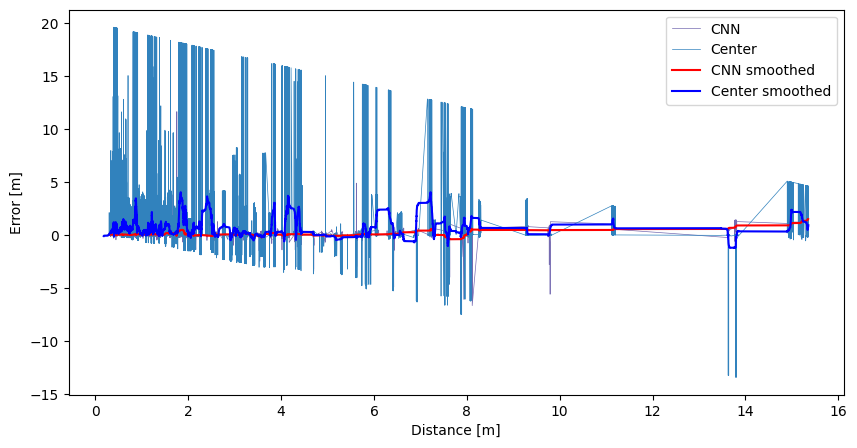

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_cnn_sorted['y_test'], df_cnn_sorted['error'], label='CNN', color=cmap(12), linewidth=0.5)
plt.plot(df_center_sorted['y_test'], df_center_sorted['error'], label='Center', color=cmap(0), linewidth=0.5)


# smooth curve with savgol filter
plt.plot(df_cnn_sorted['y_test'], savgol_filter(df_cnn_sorted['error'], 1000, 3), label='CNN smoothed', color='red')
plt.plot(df_center_sorted['y_test'], savgol_filter(df_center_sorted['error'], 1000, 3), label='Center smoothed', color='blue')

plt.xlabel('Distance [m]')
plt.ylabel('Error [m]')
plt.legend()
plt.show()

In [ ]:
# take moving mean and percentiles of errors for moving bins of size 0.5m, from 0 to 15m
window_size = 0.5
mean_error_center = []
mean_error_svr = []
mean_error_vergence = []
mean_error_cnn = []

percentile_25_center = []
percentile_25_svr = []
percentile_25_vergence = []
percentile_25_cnn = []

percentile_75_center = []
percentile_75_svr = []
percentile_75_vergence = []
percentile_75_cnn = []

In [34]:
from scipy.stats import norm

def gaussian_smoothing(df, column_to_smooth, distance_column, sigma):
    smoothed_values = []
    distances = df[distance_column].values
    errors = df[column_to_smooth].values

    for i in range(len(distances)):
        # Compute Gaussian weights based on distances
        weights = norm.pdf(distances, loc=distances[i], scale=sigma)
        weights /= weights.sum()  # Normalize weights

        # Apply weights to compute the smoothed value
        smoothed_value = np.dot(weights, errors)
        smoothed_values.append(smoothed_value)

    return smoothed_values



In [279]:
sigma_d = 0.5
df_cnn_sorted['smoothed_error_d'] = gaussian_smoothing(df_cnn_sorted, 'error_d', 'y_test_d', sigma_d)
df_center_sorted['smoothed_error_d'] = gaussian_smoothing(df_center_sorted, 'error_d', 'y_test_d', sigma_d)
df_svr_sorted['smoothed_error_d'] = gaussian_smoothing(df_svr_sorted, 'error_d', 'y_test_d', sigma_d)
df_vergence_sorted['smoothed_error_d'] = gaussian_smoothing(df_vergence_sorted, 'error_d', 'y_test_d', sigma_d)

In [280]:
display(df_vergence_sorted)

,y_test,y_pred,error,y_test_d,y_pred_d,error_d,smoothed_error,smoothed_error_d
21881,0.178506,0.149881,-0.028625,5.602054,6.671952,1.069897,-0.032427,0.907108
21887,0.178563,0.147788,-0.030775,5.600269,6.766437,1.166168,-0.032428,0.906935
21880,0.178600,0.149721,-0.028880,5.599089,6.679105,1.080015,-0.032429,0.906820
21885,0.178722,0.153738,-0.024984,5.595275,6.504578,0.909303,-0.032433,0.906447
21886,0.180424,0.151104,-0.029319,5.542505,6.617942,1.075438,-0.032483,0.901021
...,...,...,...,...,...,...,...,...
16174,15.354519,2.320501,-13.034018,0.065127,0.430941,0.365814,-12.389609,1.032090
16180,15.354521,4.750520,-10.604001,0.065127,0.210503,0.145376,-12.389610,1.032090
16175,15.354559,6.087014,-9.267545,0.065127,0.164284,0.099157,-12.389617,1.032090
16179,15.354833,1.598951,-13.755882,0.065126,0.625410,0.560284,-12.389672,1.032091


c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

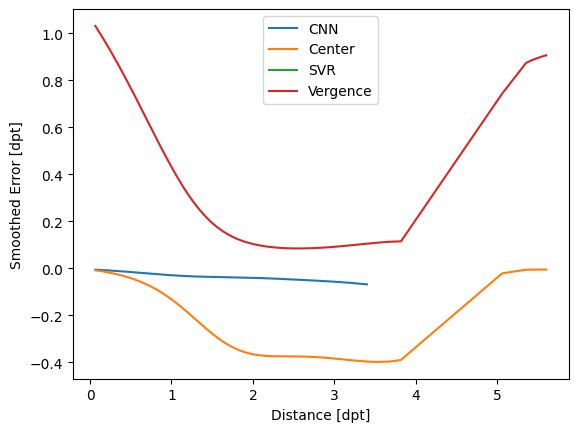

In [281]:
sns.lineplot(x='y_test_d', y='smoothed_error_d', data=df_cnn_sorted, label='CNN')
sns.lineplot(x='y_test_d', y='smoothed_error_d', data=df_center_sorted, label='Center')
sns.lineplot(x='y_test_d', y='smoothed_error_d', data=df_svr_sorted, label='SVR')
sns.lineplot(x='y_test_d', y='smoothed_error_d', data=df_vergence_sorted, label='Vergence')
plt.xlabel('Distance [dpt]')
plt.ylabel('Smoothed Error [dpt]')
plt.legend()
plt.show()

In [282]:
display(df_svr_sorted)

,y_test,y_pred,error,y_test_d,y_pred_d,error_d,smoothed_error,smoothed_error_d
25206,0.179999,0.045975,-0.134024,5.555582,21.750819,16.195237,0.544113,inf
21729,0.180209,0.049374,-0.130835,5.549104,20.253661,14.704557,0.544113,inf
23668,0.182223,0.120877,-0.061346,5.487783,8.272870,2.785087,0.544111,inf
21740,0.182240,0.090942,-0.091298,5.487255,10.996002,5.508747,0.544111,inf
8947,0.183251,0.158649,-0.024602,5.456982,6.303223,0.846241,0.544110,inf
...,...,...,...,...,...,...,...,...
15942,15.351937,12.498694,-2.853243,0.065138,0.080008,0.014870,-3.850995,inf
23284,15.351961,12.476784,-2.875177,0.065138,0.080149,0.015011,-3.850998,inf
19491,15.351981,12.040813,-3.311168,0.065138,0.083051,0.017913,-3.851000,inf
22261,15.351987,12.500958,-2.851028,0.065138,0.079994,0.014856,-3.851001,inf


In [38]:
# add column y_test binned to df_cnn_sorted, that rounds y_test to nearest interval_size
interval_size = 0.5
df_cnn_sorted['y_test_binned'] = np.round(df_cnn_sorted['y_test'] / interval_size) * interval_size - interval_size / 2
display(df_cnn_sorted)

,y_test,y_pred,error,y_test_d,y_pred_d,error_d,y_test_binned
21881,0.178506,0.178686,0.000181,5.602054,5.596394,-0.005660,-0.25
21887,0.178563,0.178968,0.000405,5.600269,5.587584,-0.012685,-0.25
21880,0.178600,0.178739,0.000139,5.599089,5.594735,-0.004354,-0.25
21885,0.178722,0.178978,0.000256,5.595275,5.587275,-0.008000,-0.25
21886,0.180424,0.180495,0.000071,5.542505,5.540328,-0.002177,-0.25
...,...,...,...,...,...,...,...
16174,15.354519,15.308220,-0.046299,0.065127,0.065324,0.000197,15.25
16180,15.354521,15.315554,-0.038967,0.065127,0.065293,0.000166,15.25
16175,15.354559,15.317874,-0.036685,0.065127,0.065283,0.000156,15.25
16179,15.354833,15.330129,-0.024704,0.065126,0.065231,0.000105,15.25


In [ ]:
pd.option_context('mode.use_inf_as_na', True)

df_cnn_sorted['y_test'] = pd.to_numeric(df_cnn_sorted['y_test'], errors='coerce')
df_cnn_sorted['y_test_binned'] = pd.to_numeric(df_cnn_sorted['y_test_binned'], errors='coerce')
df_cnn_sorted['smoothed_error'] = pd.to_numeric(df_cnn_sorted['smoothed_error'], errors='coerce')
df_cnn_sorted['error'] = pd.to_numeric(df_cnn_sorted['error'], errors='coerce')
df_cnn_sorted['smoothed_error'] = pd.to_numeric(df_cnn_sorted['smoothed_error'], errors='coerce')


print(df_cnn_sorted.groupby('y_test_binned')['smoothed_error'].count())
print(df_cnn_sorted.dtypes)
#sns.lineplot(x='y_test_binned', y='smoothed_error', data=df_cnn_sorted, errorbar='ci')
sns.lineplot(
    x='y_test_binned',
    y='error',
    data=df_cnn_sorted,
    errorbar=('ci', 95),  # Use built-in 95% confidence intervals
    label='Error with CI'
)
plt.xlabel('Distance [m]')
plt.ylabel('Error [m]')
plt.show()

KeyError: 'smoothed_error'

In [ ]:
# box plot over binned data of cnn, dont show outliers
plt.figure(figsize=(14, 5))
sns.boxplot(x='y_test_binned', y='error', data=df_cnn_sorted, showfliers=False)
# add intervals as xticks, [x-0.25, x+0.25)
plt.xlabel('Distance [m]')
plt.ylabel('Error [m]')
plt.show()

# add column y_tets_binned_d
interval_size = 0.25
df_cnn_sorted['y_test_binned_d'] = np.round(df_cnn_sorted['y_test_d'] / interval_size) * interval_size 
display(df_cnn_sorted)
# box plot over binned data of cnn, dont show outliers
plt.figure(figsize=(14, 5))
sns.boxplot(x='y_test_binned_d', y='error_d', data=df_cnn_sorted, showfliers=False)
# add intervals as xticks, [x-0.25, x+0.25)
plt.xlabel('Distance [dpt]')
plt.ylabel('Error [dpt]')
plt.show()


ValueError: Could not interpret value `y_test_binned` for `x`. An entry with this name does not appear in `data`.

<Figure size 1400x500 with 0 Axes>

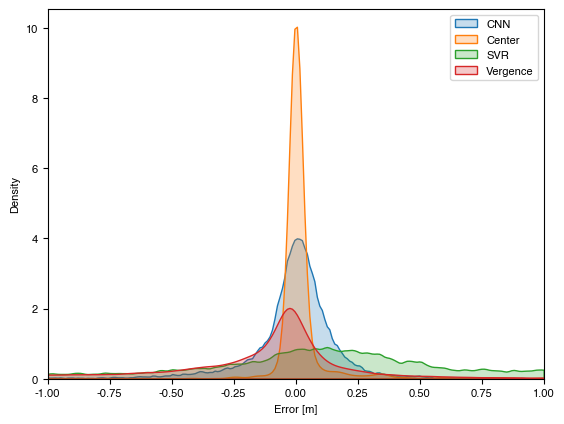

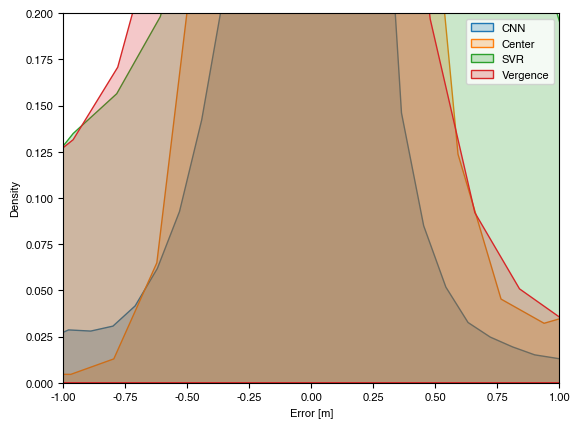

CNN
-0.41067662239074704
0.007578730583190918
0.27213493585586485
Center
-0.04264659044911867
0.0017538602081981491
3.507478274530923
SVR
-1.664561108287619
0.09648849948252519
1.257355850095929
Vergence
-5.896744250559606
-0.14906210463158714
0.6558022813171831


In [18]:
# plot sns kdeplot over errors of cnn
clip_range = 1
sns.kdeplot(data=df_cnn_m_sorted['error'], fill=True, label='CNN', clip=(-clip_range, clip_range), bw_adjust=0.1)
sns.kdeplot(data=df_center_m_sorted['error'], fill=True, label='Center', clip=(-clip_range, clip_range), bw_adjust=0.1)
sns.kdeplot(data=df_svr_m_sorted['error'], fill=True, label='SVR', clip=(-clip_range, clip_range), bw_adjust=0.1)
sns.kdeplot(data=df_vergence_m_sorted['error'], fill=True, label='Vergence', clip=(-clip_range, clip_range), bw_adjust=0.1)
plt.xlabel('Error [m]')
plt.xlim(-1, 1)
plt.legend()
plt.savefig('figures/errors_distribution_m.pdf', dpi=1000)
plt.show()

# plot sns kdeplot over errors of cnn
sns.kdeplot(data=df_cnn_m_sorted['error'], fill=True, label='CNN')
sns.kdeplot(data=df_center_m_sorted['error'], fill=True, label='Center')
sns.kdeplot(data=df_svr_m_sorted['error'], fill=True, label='SVR')
sns.kdeplot(data=df_vergence_m_sorted['error'], fill=True, label='Vergence')
plt.xlabel('Error [m]')
plt.legend()
plt.xlim(-1, 1)
plt.ylim(0, 0.2)
plt.show()

# print percentriles of errors
print('CNN')
print(np.percentile(df_cnn_m_sorted['error'], 5))
print(np.percentile(df_cnn_m_sorted['error'], 50))
print(np.percentile(df_cnn_m_sorted['error'], 95))

print('Center')
print(np.percentile(df_center_m_sorted['error'], 5))
print(np.percentile(df_center_m_sorted['error'], 50))
print(np.percentile(df_center_m_sorted['error'], 95))

print('SVR')
print(np.percentile(df_svr_m_sorted['error'], 5))
print(np.percentile(df_svr_m_sorted['error'], 50))
print(np.percentile(df_svr_m_sorted['error'], 95))

print('Vergence')
print(np.percentile(df_vergence_m_sorted['error'], 5))
print(np.percentile(df_vergence_m_sorted['error'], 50))
print(np.percentile(df_vergence_m_sorted['error'], 95))



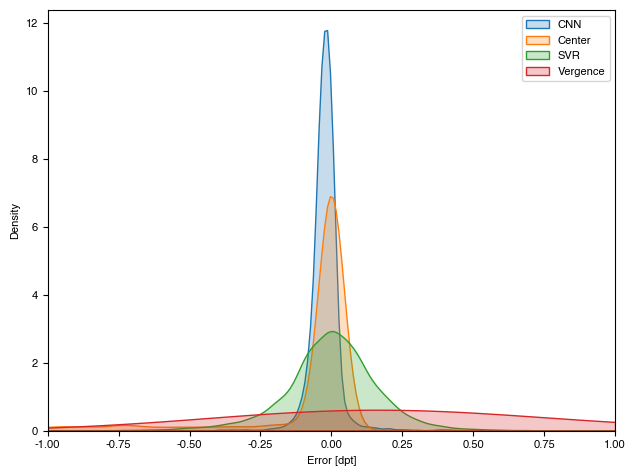

CNN
-0.09605236053466797
-0.02308487892150879
0.03389186412096014
Center
-1.1538522287678423
-0.0006452194083417101
0.013665164173013708
SVR
-0.2953015555305476
0.0022326189963473575
0.26853612094172963
Vergence
-0.30267709117629665
0.17347613696084851
1.3897309261989046


In [19]:
# plot sns kdeplot over errors of cnn for diopters
sns.kdeplot(data=df_cnn_dpt_sorted['error'], fill=True, label='CNN', clip=(-1, 1))
sns.kdeplot(data=df_center_dpt_sorted['error'], fill=True, label='Center', clip=(-1, 1))
sns.kdeplot(data=df_svr_dpt_sorted['error'], fill=True, label='SVR', clip=(-1, 1))
sns.kdeplot(data=df_vergence_dpt_sorted['error'], fill=True, label='Vergence', clip=(-1, 1))
plt.xlabel('Error [dpt]')
plt.xlim(-1, 1)
plt.legend()
plt.savefig('figures/errors_distribution_dpt.pdf', dpi=1000)
fig.supxlabel("Ground truth [dpt]")
fig.supylabel("Prediction [dpt]")

plt.tight_layout()
plt.savefig('figures/errors_distribution_dpt.pdf', dpi=1000, bbox_inches='tight', pad_inches=0)
plt.savefig('figures/errors_distribution_dpt.svg', bbox_inches='tight', pad_inches=0)
plt.show()

# print percentriles of errors
print('CNN')
print(np.percentile(df_cnn_dpt_sorted['error'], 5))
print(np.percentile(df_cnn_dpt_sorted['error'], 50))
print(np.percentile(df_cnn_dpt_sorted['error'], 95))

print('Center')
print(np.percentile(df_center_dpt_sorted['error'], 5))
print(np.percentile(df_center_dpt_sorted['error'], 50))
print(np.percentile(df_center_dpt_sorted['error'], 95))

print('SVR')
print(np.percentile(df_svr_dpt_sorted['error'], 5))
print(np.percentile(df_svr_dpt_sorted['error'], 50))
print(np.percentile(df_svr_dpt_sorted['error'], 95))

print('Vergence')
print(np.percentile(df_vergence_dpt_sorted['error'], 5))
print(np.percentile(df_vergence_dpt_sorted['error'], 50))
print(np.percentile(df_vergence_dpt_sorted['error'], 95))


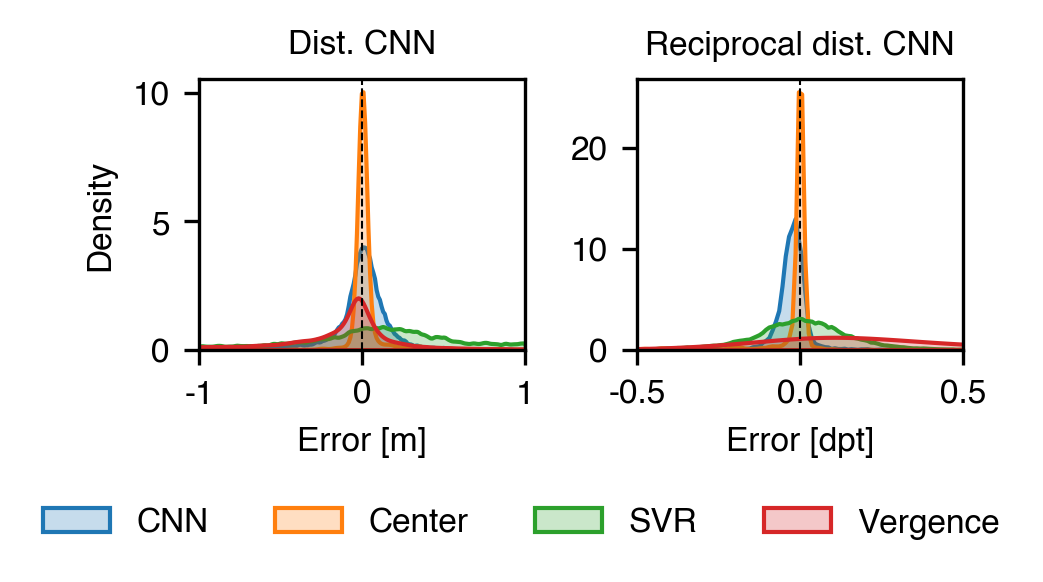

In [45]:
# subplots with two kdeplots, one for meters, one for diopters
cliprange = 1
fig, axs = plt.subplots(1, 2, figsize=(columnwidth*cm, columnwidth/2*cm), dpi=300)
sns.kdeplot(data=df_cnn_m_sorted['error'], fill=True, label='CNN', ax=axs[0], clip=(-clip_range, clip_range), bw_adjust=0.1)
sns.kdeplot(data=df_center_m_sorted['error'], fill=True, label='Center', ax=axs[0], clip=(-clip_range, clip_range), bw_adjust=0.1)
sns.kdeplot(data=df_svr_m_sorted['error'], fill=True, label='SVR', ax=axs[0], clip=(-clip_range, clip_range), bw_adjust=0.1)
sns.kdeplot(data=df_vergence_m_sorted['error'], fill=True, label='Vergence', ax=axs[0], clip=(-clip_range, clip_range), bw_adjust=0.1)
axs[0].set_xlabel('Error [m]')
axs[0].set_xlim(-1, 1)
axs[0].set_title('Dist. CNN', fontsize=8)

cliprange = 0.5
sns.kdeplot(data=df_cnn_dpt_sorted['error'], fill=True, label='CNN', ax=axs[1], clip=(-clip_range, clip_range), bw_adjust=0.2)
sns.kdeplot(data=df_center_dpt_sorted['error'], fill=True, label='Center', ax=axs[1], clip=(-clip_range, clip_range), bw_adjust=0.2)
sns.kdeplot(data=df_svr_dpt_sorted['error'], fill=True, label='SVR', ax=axs[1], clip=(-clip_range, clip_range), bw_adjust=0.2)
sns.kdeplot(data=df_vergence_dpt_sorted['error'], fill=True, label='Vergence', ax=axs[1], clip=(-clip_range, clip_range), bw_adjust=0.2)

axs[1].set_xlabel('Error [dpt]')
axs[1].set_xlim(-0.5, 0.5)
axs[1].set_title('Reciprocal dist. CNN', fontsize=8)
#axs[1].legend()


# add vertical line at 0
for ax in axs:
    ax.axvline(0, color='black', linewidth=0.5, linestyle='--')

# remove y label
axs[1].set_ylabel('')
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=False)

plt.tight_layout()
plt.savefig('figures/errors_distribution.pdf', bbox_inches='tight', pad_inches=0)
plt.savefig('figures/errors_distribution.svg', bbox_inches='tight', pad_inches=0)

plt.show()

In [289]:
# compute mean and sd over bins
cnn_means = df_cnn_sorted.groupby('y_test_binned')['error'].mean()
cnn_sds = df_cnn_sorted.groupby('y_test_binned')['error'].std()

center_means = df_center_sorted.groupby('y_test_binned')['error'].mean()
center_sds = df_center_sorted.groupby('y_test_binned')['error'].std()

svr_means = df_svr_sorted.groupby('y_test_binned')['error'].mean()
svr_sds = df_svr_sorted.groupby('y_test_binned')['error'].std()

vergence_means = df_vergence_sorted.groupby('y_test_binned')['error'].mean()
vergence_sds = df_vergence_sorted.groupby('y_test_binned')['error'].std()

# compute 5th, 25th, 75th and 95th percentile
cnn_5th = df_cnn_sorted.groupby('y_test_binned')['error'].quantile(0.05)
cnn_25th = df_cnn_sorted.groupby('y_test_binned')['error'].quantile(0.25)
cnn_75th = df_cnn_sorted.groupby('y_test_binned')['error'].quantile(0.75)
cnn_95th = df_cnn_sorted.groupby('y_test_binned')['error'].quantile(0.95)

center_5th = df_center_sorted.groupby('y_test_binned')['error'].quantile(0.05)
center_25th = df_center_sorted.groupby('y_test_binned')['error'].quantile(0.25)
center_75th = df_center_sorted.groupby('y_test_binned')['error'].quantile(0.75)
center_95th = df_center_sorted.groupby('y_test_binned')['error'].quantile(0.95)

svr_5th = df_svr_sorted.groupby('y_test_binned')['error'].quantile(0.05)
svr_25th = df_svr_sorted.groupby('y_test_binned')['error'].quantile(0.25)
svr_75th = df_svr_sorted.groupby('y_test_binned')['error'].quantile(0.75)
svr_95th = df_svr_sorted.groupby('y_test_binned')['error'].quantile(0.95)

vergence_5th = df_vergence_sorted.groupby('y_test_binned')['error'].quantile(0.05)
vergence_25th = df_vergence_sorted.groupby('y_test_binned')['error'].quantile(0.25)
vergence_75th = df_vergence_sorted.groupby('y_test_binned')['error'].quantile(0.75)
vergence_95th = df_vergence_sorted.groupby('y_test_binned')['error'].quantile(0.95)


KeyError: 'y_test_binned'

c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

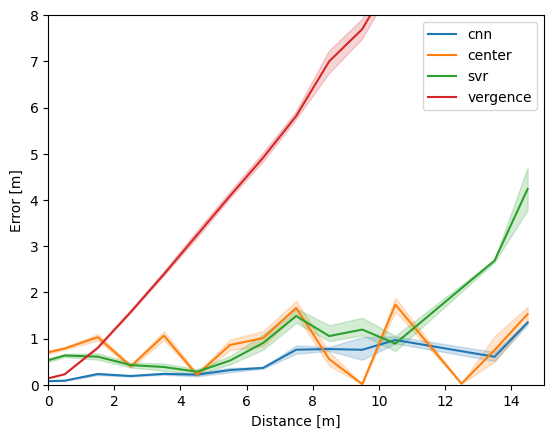

In [ ]:
interval_size = 1
df_cnn_sorted['y_test_binned'] = np.round(df_cnn_sorted['y_test'] / interval_size) * interval_size - interval_size / 2
df_center_sorted['y_test_binned'] = np.round(df_center_sorted['y_test'] / interval_size) * interval_size - interval_size / 2
df_svr_sorted['y_test_binned'] = np.round(df_svr_sorted['y_test'] / interval_size) * interval_size - interval_size / 2
df_vergence_sorted['y_test_binned'] = np.round(df_vergence_sorted['y_test'] / interval_size) * interval_size - interval_size / 2

sns.lineplot(
    x='y_test_binned',
    y='error',
    data=df_cnn_sorted,
    errorbar=('ci', 99),  # Use built-in 95% confidence intervals
    label='cnn'
)
sns.lineplot(
    x='y_test_binned',
    y='error',
    data=df_center_sorted,
    errorbar=('ci', 99),  # Use built-in 95% confidence intervals
    label='center'
)
sns.lineplot(
    x='y_test_binned',
    y='error',
    data=df_svr_sorted,
    errorbar=('ci', 99),  # Use built-in 95% confidence intervals
    label='svr'
)

sns.lineplot(
    x='y_test_binned',
    y='error',
    data=df_vergence_sorted,
    errorbar=('ci', 99),  # Use built-in 95% confidence intervals
    label='vergence'
)

plt.xlim(0, 15)
plt.ylim(0, 8)
plt.xlabel('Distance [m]')
plt.ylabel('Error [m]')
plt.show()

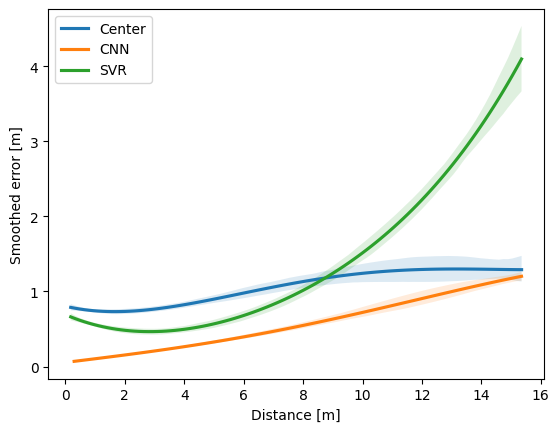

In [ ]:
# plot sns regplot with 95% confidence intervals
sns.regplot(x='y_test', y='error', data=df_center_sorted, x_bins=15, x_ci=99, fit_reg=True, n_boot=1000, order=4, x_estimator=np.median, label='Center', scatter=False, ci=99)
sns.regplot(x='y_test', y='error', data=df_cnn_sorted, x_bins=15, x_ci=99, fit_reg=True, n_boot=1000, order=4, x_estimator=np.median, label='CNN', scatter=False, ci=99)
sns.regplot(x='y_test', y='error', data=df_svr_sorted, x_bins=15, x_ci=99, fit_reg=True, n_boot=1000, order=4, x_estimator=np.median, label='SVR', scatter=False, ci=99)
#sns.regplot(x='y_test', y='error', data=df_vergence_sorted, x_bins=15, x_ci=99, fit_reg=True, n_boot=1000, order=4, x_estimator=np.median, label='Vergence', scatter=False, ci=99)
#plt.scatter(df_cnn_sorted['y_test'], df_cnn_sorted['error'], color='blue', s=1)

#sns.regplot(x='y_test', y='error', data=df_vergence_sorted, x_bins=10, x_ci=None, fit_reg=True, n_boot=100, order=8, x_estimator=np.median)
plt.xlabel('Distance [m]')
plt.ylabel('Smoothed error [m]')
plt.legend()
plt.show()

In [197]:
'''
# plot sns regplot with 95% confidence intervals
sns.regplot(x='y_test', y='error', data=df_cnn_sorted, robust=True)
sns.regplot(x='y_test', y='error', data=df_svr_sorted, robust=True)
sns.regplot(x='y_test', y='error', data=df_center_sorted, robust=True)
#sns.regplot(x='y_test', y='error', data=df_vergence_sorted, x_bins=15, x_ci=99, fit_reg=True, n_boot=1000, order=4, x_estimator=np.median, label='Vergence', scatter=False, ci=99)
#plt.scatter(df_cnn_sorted['y_test'], df_cnn_sorted['error'], color='blue', s=1)

#sns.regplot(x='y_test', y='error', data=df_vergence_sorted, x_bins=10, x_ci=None, fit_reg=True, n_boot=100, order=8, x_estimator=np.median)
plt.xlabel('Distance [m]')
plt.ylabel('Error [m]')
plt.legend()
plt.show()
'''

"\n# plot sns regplot with 95% confidence intervals\nsns.regplot(x='y_test', y='error', data=df_cnn_sorted, robust=True)\nsns.regplot(x='y_test', y='error', data=df_svr_sorted, robust=True)\nsns.regplot(x='y_test', y='error', data=df_center_sorted, robust=True)\n#sns.regplot(x='y_test', y='error', data=df_vergence_sorted, x_bins=15, x_ci=99, fit_reg=True, n_boot=1000, order=4, x_estimator=np.median, label='Vergence', scatter=False, ci=99)\n#plt.scatter(df_cnn_sorted['y_test'], df_cnn_sorted['error'], color='blue', s=1)\n\n#sns.regplot(x='y_test', y='error', data=df_vergence_sorted, x_bins=10, x_ci=None, fit_reg=True, n_boot=100, order=8, x_estimator=np.median)\nplt.xlabel('Distance [m]')\nplt.ylabel('Error [m]')\nplt.legend()\nplt.show()\n"

TODO: Custom lineplot  
- bin in bins of 0.5m  
- compute median, and confidence intervals  
- plot median  
- fill between lower and upper ci

c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


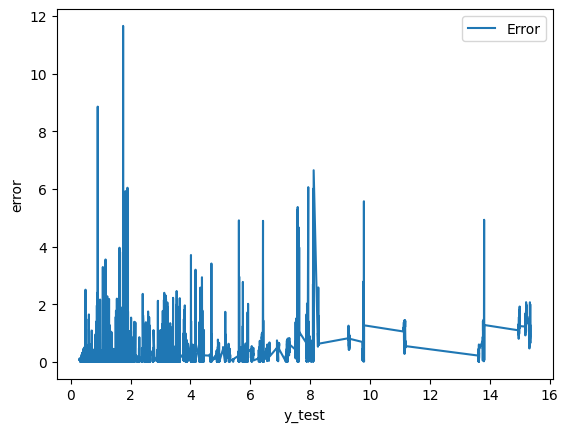

In [ ]:
sns.lineplot(x='y_test', y='error', data=df_cnn_sorted, label='Error', errorbar='ci')

plt.show()

c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

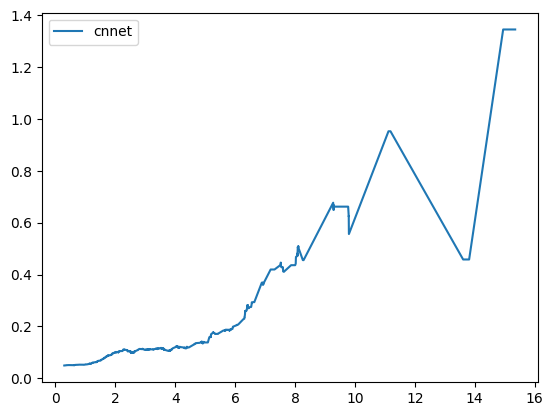

In [199]:
#for i, model in enumerate(models_d):
    # plot seaborn lineplot
id = 1
window_size = 0.5

y_pred = y_pred_m[id]
y_test = y_test_m[id]
errors = errors_m[id]

median_error = []

for j, dist in enumerate(y_test):
    while(len(errors[(y_test >= dist - window_size) & (y_test < dist + window_size)]) < 10):
        window_size += 0.25
    
    errors_in_window = errors[(y_test >= dist - window_size) & (y_test < dist + window_size)]

    median_error.append(np.median(errors_in_window))


sns.lineplot(x=y_test, y=median_error, label=models_m[id])
